<a href="https://colab.research.google.com/github/Ruo-LU/-7-/blob/main/%E7%AC%AC_7%E7%B5%84%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業繳交資訊
#### 請同學將作業下載成「第 n 組作業.ipynb」後上傳至[python作業繳交區表單](https://forms.gle/H2XP3vj8qhjN3rhX9)
#### 每組只需上傳1份
#### 作業可以討論，但請勿抄襲（借別人抄跟抄別人的都連坐罰）

# 分組資訊
## 組別：7
## 主題：Region Latin America
## 組員名單（學號/姓名）：412351500/呂若綺、4123515196/郭尚諺、412351213/王宥臻、412351237/吳佳玲
1.
2.

……


# 資料集說明
資料集來源：[ESG & Financial Performance Dataset](https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset)

欄位名稱及資料型態
1. 公司代碼(CompanyID)：Object
2. 產業(Industry)：Object
3. 所在地區(Region)：Object
4. 資料年份(Year)：int
5. 年收入_百萬美元(Revenue)：float
6. 邊際利潤(ProfitMargin)：float
7. 市值_百萬美元(MarketCap)：float
8. 年收成長率(GrowthRate)：float
9. ESG總得分(ESG_Overall)：float
10. 永續環境(ESG_Environmental)：float
11. 社會責任(ESG_Social)：float
12. 公司治理(ESG_Governance)：float
13. 二氧化碳排放量(CarbonEmissions)：float
14. 用水量(WaterUsage)：float
15. 能源消費(EnergyConsumption)：float

# 第一題、匯入資料集(17% = 4% + 4% + 9%)
#### (1)利用input指令讓使用者自行輸入已共享google試算表的連結代碼（變數名稱為ID）以取得後續資料
#### (2)將抓取google試算表的下載網址定義成一個字串變數(Filename)
#### (3)利用pandas中的read_excel分別讀入「Financial_Data」、「ESG_Score」、「OTHERS」三張頁籤的資料（工作表名稱即為資料集的變數名稱）

In [ ]:
import pandas as pd

ID = input("請輸入 Google 試算表的 ID：")

filename = f"https://docs.google.com/spreadsheets/d/{ID}/export?format=xlsx"

Financial_Data = pd.read_excel(filename, sheet_name='Financial_Data')
ESG_Score = pd.read_excel(filename, sheet_name='ESG_Score')
OTHERS = pd.read_excel(filename, sheet_name='OTHERS')

latin_fin = Financial_Data[Financial_Data["Region"] == "Latin America"]
latin_esg = ESG_Score[ESG_Score["CompanyID"].isin(latin_fin["CompanyID"])]
latin_others = OTHERS[OTHERS["CompanyID"].isin(latin_fin["CompanyID"])]

print("\n【拉丁美洲 Financial_Data】")
print(latin_fin)

print("\n【拉丁美洲 ESG_Score】")
print(latin_esg)

print("\n【拉丁美洲 OTHERS】")
print(latin_others)

請輸入 Google 試算表的 ID：14Oa-3Nz1JXab7xo6E_VFXcJVYM2tvYHu

【拉丁美洲 Financial_Data】
     CompanyID        Industry         Region  Year   Revenue  ProfitMargin  \
0            1          Retail  Latin America  2025     734.5           5.0   
2            3  Transportation  Latin America  2025     479.8          11.6   
9           10      Technology  Latin America  2025  104787.3          17.1   
18          19      Technology  Latin America  2025  180810.4           0.7   
21          22   Manufacturing  Latin America  2025    1009.7          11.8   
..         ...             ...            ...   ...       ...           ...   
983        984       Utilities  Latin America  2025     326.1           9.4   
985        986          Retail  Latin America  2025    6466.6          -2.4   
992        993      Healthcare  Latin America  2025    8472.9          17.0   
994        995      Healthcare  Latin America  2025    2805.6           9.3   
999       1000  Consumer Goods  Latin America  2025    

# 第二題、合併資料集（用pd.merge 或 pd.concat）(5%)
#### 請將上面三個資料集（Financial_Data、ESG_Score、OTHERS）合併成一個資料集(Company_ESG)

In [ ]:

merged1 = pd.merge(latin_fin, latin_esg, on="CompanyID", how="inner")


Company_ESG = pd.merge(merged1, latin_others, on="CompanyID", how="inner")


print("✅ 合併後的拉丁美洲 Company_ESG 資料：")
print(Company_ESG)

✅ 合併後的拉丁美洲 Company_ESG 資料：
     CompanyID        Industry         Region  Year   Revenue  ProfitMargin  \
0            1          Retail  Latin America  2025     734.5           5.0   
1            3  Transportation  Latin America  2025     479.8          11.6   
2           10      Technology  Latin America  2025  104787.3          17.1   
3           19      Technology  Latin America  2025  180810.4           0.7   
4           22   Manufacturing  Latin America  2025    1009.7          11.8   
..         ...             ...            ...   ...       ...           ...   
132        984       Utilities  Latin America  2025     326.1           9.4   
133        986          Retail  Latin America  2025    6466.6          -2.4   
134        993      Healthcare  Latin America  2025    8472.9          17.0   
135        995      Healthcare  Latin America  2025    2805.6           9.3   
136       1000  Consumer Goods  Latin America  2025    3173.5          17.5   

     MarketCap  GrowthRa

# 第三題、確認資料型態(10%)
#### 請用info()確認「資料集Company_ESG」的資料型態是否符合上述資料集說明中的定義，如果不符合，請轉成適合的型別，再存回「資料集Company_ESG」中。

In [ ]:
print("【修正前資料型別】")
Company_ESG.info()

type_fix = {
    "CompanyID": str,
    "Name": str,
    "Year": int,
    "ESGScore": float,
    "ReportDate": "datetime64[ns]"
}

for col, dtype in type_fix.items():
    if col in Company_ESG.columns:
        if dtype == "datetime64[ns]":
            Company_ESG[col] = pd.to_datetime(Company_ESG[col], errors="coerce")
        else:
            Company_ESG[col] = Company_ESG[col].astype(dtype)

print("\n【修正後資料型別】")
Company_ESG.info()


【修正前資料型別】
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CompanyID            137 non-null    object 
 1   Industry             137 non-null    object 
 2   Region               137 non-null    object 
 3   Year                 137 non-null    int64  
 4   Revenue              137 non-null    float64
 5   ProfitMargin         137 non-null    float64
 6   MarketCap            137 non-null    float64
 7   GrowthRate           137 non-null    float64
 8   ESG_Overall_x        137 non-null    float64
 9   ESG_Environmental_x  137 non-null    float64
 10  ESG_Social_x         137 non-null    float64
 11  ESG_Governance_x     137 non-null    float64
 12  CarbonEmissions_x    137 non-null    float64
 13  WaterUsage_x         137 non-null    float64
 14  EnergyConsumption_x  137 non-null    float64
 15  ESG_Overall_y        137 non-n

# 第四題、刪除特定資料(5%)
#### 因此資料皆為2025年的資料，所以「資料集Company_ESG」中的year皆相同，無區別性，故請用drop()將此year刪除，並存回「資料集Company_ESG」的year中

In [ ]:
if "Year" in Company_ESG.columns:
    Company_ESG = Company_ESG.drop(columns=["Year"])

print("✅ 已刪除 Year 欄位，以下是更新後的 Company_ESG：\n")
print(Company_ESG)


✅ 已刪除 Year 欄位，以下是更新後的 Company_ESG：

    CompanyID        Industry         Region   Revenue  ProfitMargin  \
0           1          Retail  Latin America     734.5           5.0   
1           3  Transportation  Latin America     479.8          11.6   
2          10      Technology  Latin America  104787.3          17.1   
3          19      Technology  Latin America  180810.4           0.7   
4          22   Manufacturing  Latin America    1009.7          11.8   
..        ...             ...            ...       ...           ...   
132       984       Utilities  Latin America     326.1           9.4   
133       986          Retail  Latin America    6466.6          -2.4   
134       993      Healthcare  Latin America    8472.9          17.0   
135       995      Healthcare  Latin America    2805.6           9.3   
136      1000  Consumer Goods  Latin America    3173.5          17.5   

     MarketCap  GrowthRate  ESG_Overall_x  ESG_Environmental_x  ESG_Social_x  \
0        628.8     

# 第五題、欄位名稱變更及重新定義資料集索引(10%)
#### (1)請用rename將「CompanyID」更名為「ID」，以及「CarbonEmissions」更名為「CO2排放量」，並存回「資料集Company_ESG」中
#### (2)請用set_index將ID定義為「資料集Company_ESG」的索引

In [ ]:
if "CarbonEmissions_x" in Company_ESG.columns:
    Company_ESG = Company_ESG.rename(columns={"CarbonEmissions_x": "CO2排放量"})
else:
    print("⚠️ 找不到欄位 CarbonEmissions_x，請確認欄位名稱")

if Company_ESG.index.name == "CompanyID":
    Company_ESG.index.name = "ID"
elif "CompanyID" in Company_ESG.columns:
    Company_ESG = Company_ESG.set_index("CompanyID")
    Company_ESG.index.name = "ID"
else:
    print("⚠️ 無法找到 CompanyID，請確認合併時是否被當作索引或移除")

print("✅ 第五題完成：以下為已更名並重新設索引後的 Company_ESG 全部資料：\n")
print(Company_ESG.to_string())


✅ 第五題完成：以下為已更名並重新設索引後的 Company_ESG 全部資料：

            Industry         Region   Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall_x  ESG_Environmental_x  ESG_Social_x  ESG_Governance_x      CO2排放量  WaterUsage_x  EnergyConsumption_x  ESG_Overall_y  ESG_Environmental_y  ESG_Social_y  ESG_Governance_y  CarbonEmissions_y  WaterUsage_y  EnergyConsumption_y
ID                                                                                                                                                                                                                                                                                                                             
1             Retail  Latin America     734.5           5.0      628.8         6.9           59.2                 70.7          29.1              78.0     51805.8       25902.9             103611.7           59.2                 70.7          29.1              78.0            51805.8       25902.9             103611.

# 第六題、資料排序(5%)
#### 請將「資料集Company_ESG」的資料依ESG_Overall大小由大至小排序，並將排序結果回存至「資料集Company_ESG」中

In [ ]:
Company_ESG = Company_ESG.sort_values(by="ESG_Overall_x", ascending=False)

print(Company_ESG.to_string())


            Industry         Region   Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall_x  ESG_Environmental_x  ESG_Social_x  ESG_Governance_x      CO2排放量  WaterUsage_x  EnergyConsumption_x  ESG_Overall_y  ESG_Environmental_y  ESG_Social_y  ESG_Governance_y  CarbonEmissions_y  WaterUsage_y  EnergyConsumption_y
ID                                                                                                                                                                                                                                                                                                                             
870          Finance  Latin America   10588.4           2.0     2859.0        10.0           96.0                100.0          93.3              94.7    105884.1       52942.1             264710.3           96.0                100.0          93.3              94.7           105884.1       52942.1             264710.3
28        Technology  Latin America    6

# 第七題、重新定義變數涵意及新增變數(18% = 3% + 10% + 5%)
#### (1)建立一個空的list變數(New_Group)
#### (2)利用for迴圈及ifelse判斷式將「資料集Company_ESG」中的ESG_Overall重新定義成3組別：
- 小於60分(不含60)
- 60-80分(不含80)
- 80分以上

#### (3)在「資料集Company_ESG」中新增一個欄位為「ESG成績分組」。

In [ ]:
New_Group = []

for score in Company_ESG["ESG_Overall_x"]:
    if score < 60:
        New_Group.append("小於60分(不含60)")
    elif score < 80:
        New_Group.append("60-80分(不含80)")
    else:
        New_Group.append("80分以上")

Company_ESG["ESG成績分組"] = New_Group

print(Company_ESG[["ESG_Overall_x", "ESG成績分組"]].to_string())


      ESG_Overall_x       ESG成績分組
ID                               
870            96.0         80分以上
28             81.7         80分以上
838            80.9         80分以上
335            78.4  60-80分(不含80)
463            78.0  60-80分(不含80)
55             77.9  60-80分(不含80)
733            75.1  60-80分(不含80)
580            73.7  60-80分(不含80)
260            73.7  60-80分(不含80)
664            72.7  60-80分(不含80)
131            72.7  60-80分(不含80)
837            71.5  60-80分(不含80)
367            71.1  60-80分(不含80)
993            71.0  60-80分(不含80)
691            70.7  60-80分(不含80)
727            70.7  60-80分(不含80)
10             69.6  60-80分(不含80)
656            69.6  60-80分(不含80)
871            69.0  60-80分(不含80)
155            67.9  60-80分(不含80)
814            67.6  60-80分(不含80)
862            66.9  60-80分(不含80)
152            66.8  60-80分(不含80)
398            66.7  60-80分(不含80)
93             66.7  60-80分(不含80)
584            66.5  60-80分(不含80)
909            66.4  60-80分(不含80)
629           

# 第八題、資料篩選(loc)(10%)
#### 依分組名單中的主題選取符合主題條件的列資料，以及須保留以下欄位，並另存成「資料集ESG_NumericData」：
1. ESG_Overall
2. ESG_Environmental
3. ESG_Social
4. ESG_Governance
5. CO2排放量
6. WaterUsage
7. EnergyConsumption

In [ ]:
groups = ["小於60分(不含60)", "60-80分(不含80)", "80分以上"]

columns_to_keep = [
    "ESG_Overall_x", "ESG_Environmental_x", "ESG_Social_x",
    "ESG_Governance_x", "CO2排放量", "WaterUsage_x", "EnergyConsumption_x"
]

for group in groups:
    ESG_NumericData = Company_ESG.loc[Company_ESG["ESG成績分組"] == group, columns_to_keep]

    print(f"\n📊 ESG 分組：{group}（共 {len(ESG_NumericData)} 筆）")
    print(ESG_NumericData.to_string())



📊 ESG 分組：小於60分(不含60)（共 94 筆）
      ESG_Overall_x  ESG_Environmental_x  ESG_Social_x  ESG_Governance_x      CO2排放量  WaterUsage_x  EnergyConsumption_x
ID                                                                                                                     
314            59.6                 21.7          89.8              67.4    160509.8      200637.3             802549.1
933            59.6                 95.2          53.3              30.3    411764.5      514705.7            2058822.7
822            59.5                 53.0          77.4              48.1     17806.1        8903.1              44515.4
175            59.4                100.0          16.8              61.5    111416.9       55708.5             278542.3
1              59.2                 70.7          29.1              78.0     51805.8       25902.9             103611.7
547            58.9                 89.4          37.4              49.9    546298.0      163889.4            5462980.2
741       

# 第九題、計算統計量(10% = 4% + 3% + 3%)
#### 請以「資料集ESG_NumericData」計算：
1. 所有欄位個別的平均數、標準差
2. EnergyConsumption的中位數
3. 所有變數的變異係數矩陣

In [ ]:
mean_values = ESG_NumericData.mean()
std_values = ESG_NumericData.std()

print("📌 各欄位平均數：")
print(mean_values)

print("\n📌 各欄位標準差：")
print(std_values)

median_energy = ESG_NumericData["EnergyConsumption_x"].median()
print("\n📌 EnergyConsumption 的中位數：", median_energy)

cv_matrix = pd.DataFrame(index=std_values.index, columns=mean_values.index)

for row_var in std_values.index:
    for col_var in mean_values.index:
        cv_matrix.loc[row_var, col_var] = std_values[row_var] / mean_values[col_var]

print("\n📌 變異係數矩陣（CV_ij = std_i / mean_j）：")
print(cv_matrix)


📌 各欄位平均數：
ESG_Overall_x              86.200000
ESG_Environmental_x        93.966667
ESG_Social_x               77.966667
ESG_Governance_x           86.666667
CO2排放量                 175172.400000
WaterUsage_x            93148.033333
EnergyConsumption_x    410121.933333
dtype: float64

📌 各欄位標準差：
ESG_Overall_x               8.496470
ESG_Environmental_x        10.450040
ESG_Social_x               18.936297
ESG_Governance_x            8.962329
CO2排放量                  73799.771766
WaterUsage_x            37215.660158
EnergyConsumption_x    195179.220790
dtype: float64

📌 EnergyConsumption 的中位數： 333708.6

📌 變異係數矩陣（CV_ij = std_i / mean_j）：
                    ESG_Overall_x ESG_Environmental_x ESG_Social_x  \
ESG_Overall_x            0.098567             0.09042     0.108976   
ESG_Environmental_x       0.12123             0.11121     0.134032   
ESG_Social_x             0.219679            0.201521     0.242877   
ESG_Governance_x         0.103971            0.095378     0.114951   
CO2排放量    

# 第十題、資料分組(groupby或pivot_table)(10% = 4% + 2% + 2% + 2%)
#### 請以「資料集Company_ESG」的「ESG成績分組」欄位進行分組，分別計算各組之資料筆數及最大、最小值

In [ ]:
grouped = Company_ESG.groupby("ESG成績分組")

group_counts = grouped.size()

group_max = grouped.max(numeric_only=True)

group_min = grouped.min(numeric_only=True)

print("📌 各分組資料筆數：")
print(group_counts)

print("\n📌 各分組欄位最大值：")
print(group_max)

print("\n📌 各分組欄位最小值：")
print(group_min)


📌 各分組資料筆數：
ESG成績分組
60-80分(不含80)    40
80分以上            3
小於60分(不含60)     94
dtype: int64

📌 各分組欄位最大值：
               Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall_x  \
ESG成績分組                                                                      
60-80分(不含80)  144823.6          31.3   635311.9        26.6           78.4   
80分以上          20162.6          17.5    18520.1        10.6           96.0   
小於60分(不含60)   180810.4          40.8   115357.9        25.1           59.6   

              ESG_Environmental_x  ESG_Social_x  ESG_Governance_x      CO2排放量  \
ESG成績分組                                                                         
60-80分(不含80)                100.0         100.0              92.2  17564369.4   
80分以上                       100.0          93.3              94.7    252778.8   
小於60分(不含60)                 100.0          99.3              82.2  36033380.0   

              WaterUsage_x  EnergyConsumption_x  ESG_Overall_y  \
ESG成績分組                            

# 第十一題、請以「資料集Company_ESG」繪製以下統計圖表：(20%)
1. ESG_Environmental的直方圖
2. 以「Industry」為分組依據，ESG_Overall的盒形圖
3. 以第十題中的「ESG成績分組」資料筆數的圓餅圖
4. 「Revenue」及「EnergyConsumption」兩變數的散佈圖


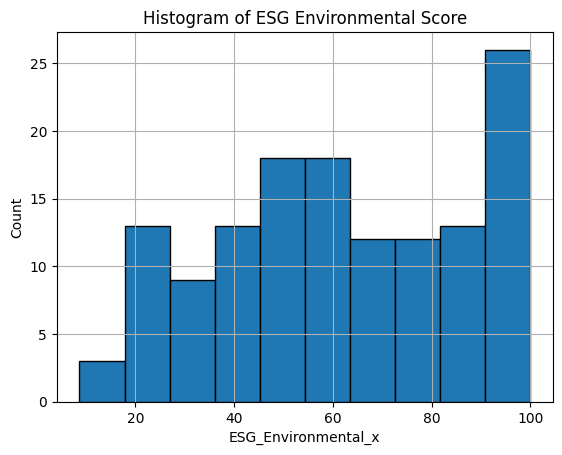

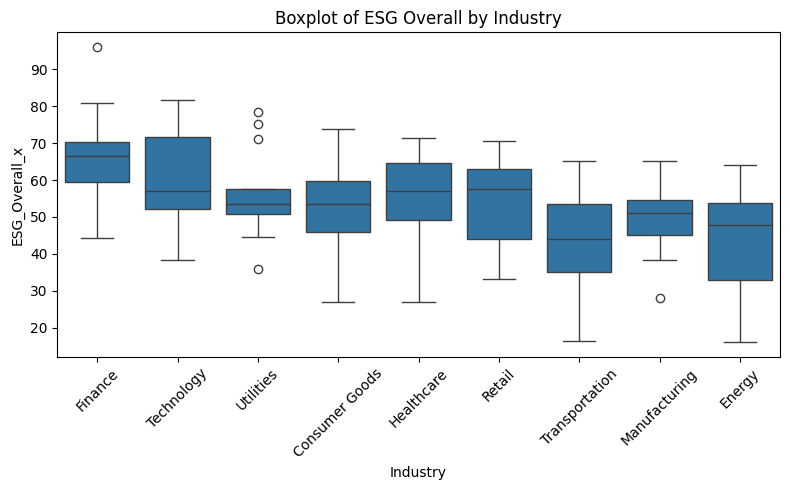

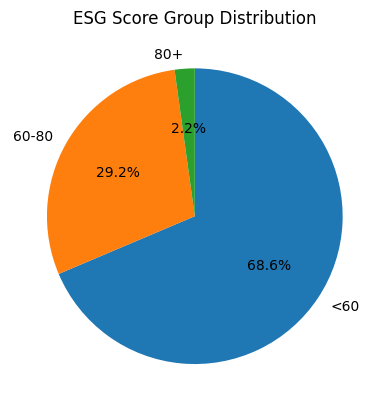

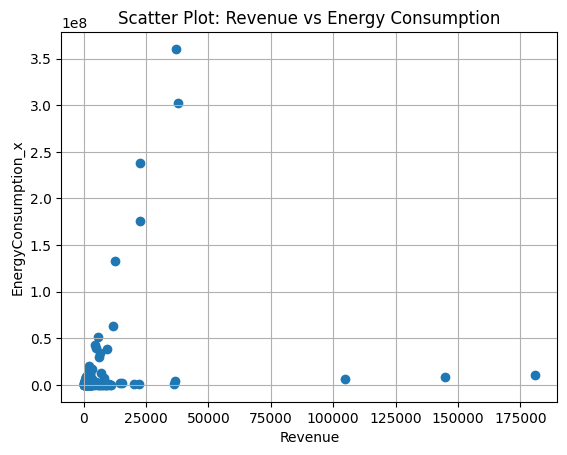

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

plt.figure()
Company_ESG["ESG_Environmental_x"].hist(bins=10, edgecolor='black')
plt.title("Histogram of ESG Environmental Score")
plt.xlabel("ESG_Environmental_x")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=Company_ESG, x="Industry", y="ESG_Overall_x")
plt.title("Boxplot of ESG Overall by Industry")
plt.xlabel("Industry")
plt.ylabel("ESG_Overall_x")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label_map = {
    "80分以上": "80+",
    "60-80分(不含80)": "60-80",
    "小於60分(不含60)": "<60"
}
Company_ESG["ESG_Group_Eng"] = Company_ESG["ESG成績分組"].map(label_map)

plt.figure()
Company_ESG["ESG_Group_Eng"].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, counterclock=False
)
plt.title("ESG Score Group Distribution")
plt.ylabel("")
plt.show()

plt.figure()
plt.scatter(Company_ESG["Revenue"], Company_ESG["EnergyConsumption_x"])
plt.title("Scatter Plot: Revenue vs Energy Consumption")
plt.xlabel("Revenue")
plt.ylabel("EnergyConsumption_x")
plt.grid(True)
plt.show()
